Dataset shape: (1127, 2)
             timestamp  value
0  2015-09-08 11:39:00     73
1  2015-09-08 11:44:00     62
2  2015-09-08 11:59:00     66
3  2015-09-08 12:19:00     69
4  2015-09-08 12:24:00     65
Input shape: (1103, 24)


C:\Users\Sanketh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2324 - val_loss: 0.0192
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0171 - val_loss: 0.0076
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0104 - val_loss: 0.0075
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0083 - val_loss: 0.0073
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0087 - val_loss: 0.0072
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

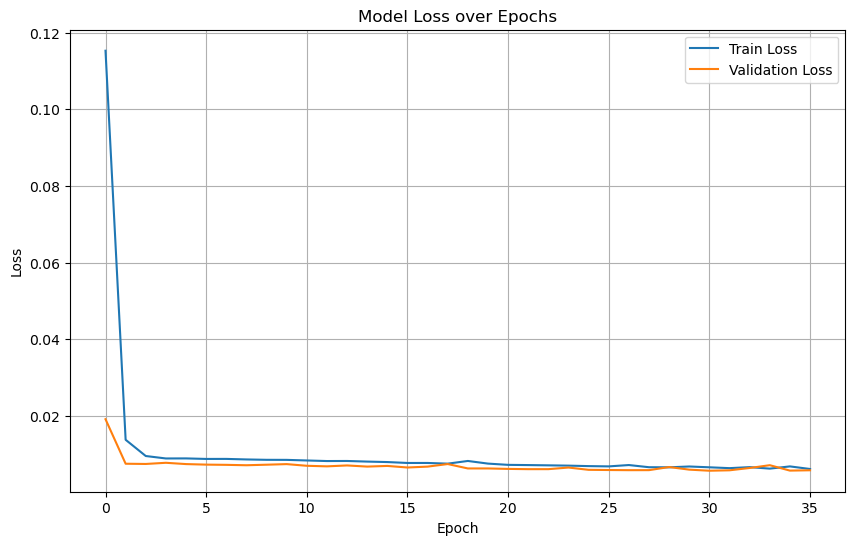

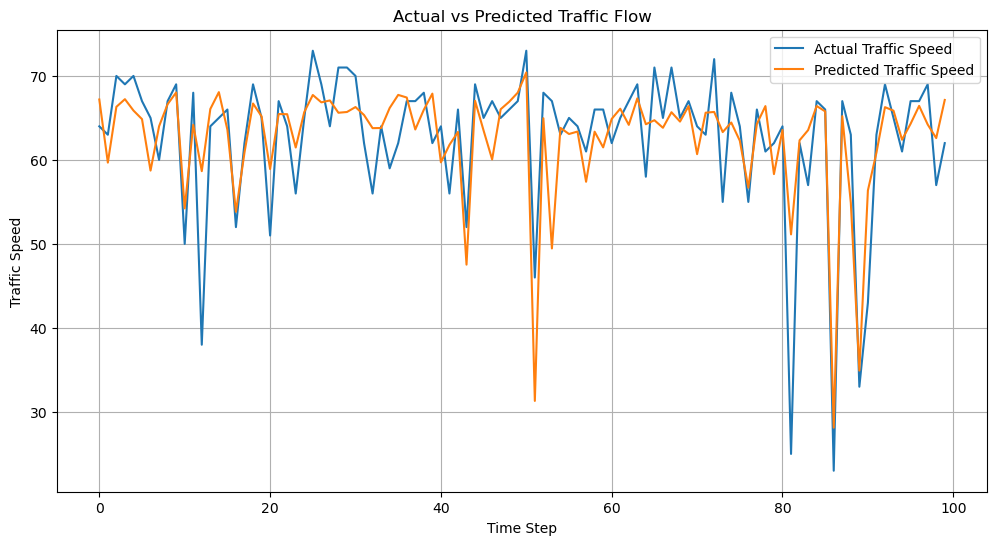

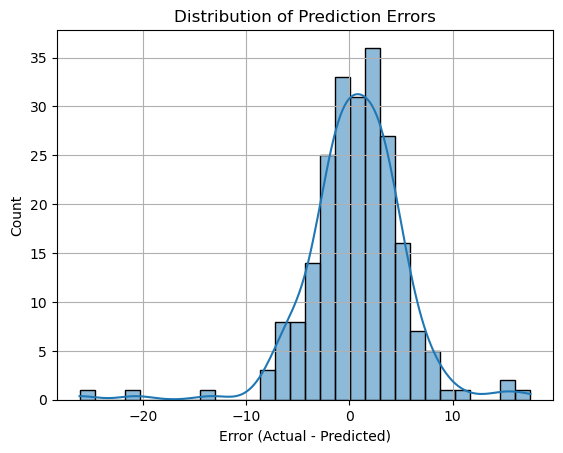

Model and visualization completed successfully!


In [1]:
# Traffic Flow Prediction using Deep Learning (LSTM)

# Install necessary libraries
# pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load Dataset
# We'll use a public traffic dataset: PeMS-SF (sample)
url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv'

df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())

# Step 2: Data Preprocessing
# We'll work with the 'value' column (speed)
df.rename(columns={'value': 'traffic_speed'}, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['traffic_speed'] = scaler.fit_transform(df[['traffic_speed']])

# Create sequences for LSTM
SEQ_LEN = 24  # Past 24 points to predict next point

def create_sequences(data, seq_len):
    xs = []
    ys = []
    for i in range(len(data) - seq_len):
        x = data[i:(i+seq_len)]
        y = data[i+seq_len]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(df['traffic_speed'].values, SEQ_LEN)
print("Input shape:", X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 3: Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(SEQ_LEN, 1), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

# Step 4: Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Step 5: Evaluate and Predict
y_pred = model.predict(X_test)

# Inverse scaling to get real values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Step 6: Visualization

# 1. Loss Curve
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 2. True vs Predicted Traffic Speed
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled[:100], label='Actual Traffic Speed')
plt.plot(y_pred_rescaled[:100], label='Predicted Traffic Speed')
plt.title('Actual vs Predicted Traffic Flow')
plt.xlabel('Time Step')
plt.ylabel('Traffic Speed')
plt.legend()
plt.grid()
plt.show()

# 3. Heatmap of Predictions Error
errors = y_test_rescaled.flatten() - y_pred_rescaled.flatten()
sns.histplot(errors, kde=True, bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.grid()
plt.show()

print("Model and visualization completed successfully!")